In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"spam.csv", encoding='ISO-8859-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
data.shape

(5572, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
data.shape

(5572, 2)

In [10]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df=data.rename(columns={'v1':'Target','v2':'Message'})

In [12]:
df.shape

(5572, 2)

In [13]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5169, dtype: bool

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

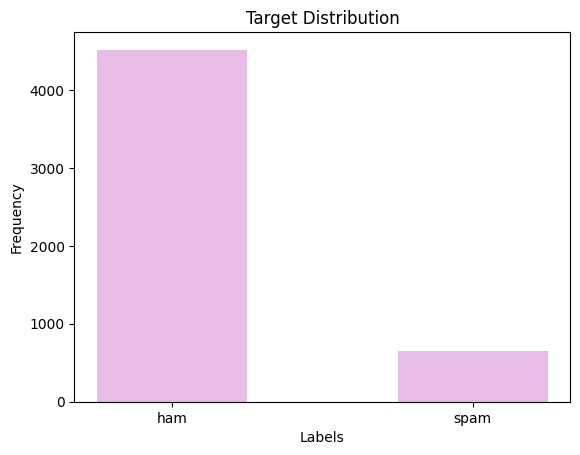

In [29]:
plt.hist(df['Target'], bins=2, color='plum', alpha=0.7, rwidth=0.5)
plt.title("Target Distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks([0.25, 0.75], ['ham', 'spam'])
plt.show()

In [30]:
x=df['Message']
y=df['Target']

In [31]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [32]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [35]:
cv=CountVectorizer()

In [36]:
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)

In [37]:
print(x_train_cv)

  (0, 3793)	1
  (0, 6940)	1
  (0, 2668)	1
  (0, 3400)	2
  (0, 2317)	1
  (0, 6927)	1
  (0, 3773)	1
  (0, 1354)	1
  (0, 3294)	1
  (0, 1051)	1
  (1, 6940)	3
  (1, 3360)	1
  (1, 2266)	1
  (1, 3035)	1
  (1, 2927)	1
  (1, 6237)	1
  (1, 851)	1
  (1, 5418)	1
  (1, 1289)	1
  (1, 5717)	1
  (2, 4222)	1
  (2, 4110)	1
  (2, 4398)	1
  (2, 4757)	1
  (2, 5665)	1
  :	:
  (3615, 3204)	1
  (3615, 5676)	1
  (3616, 6267)	1
  (3616, 1468)	1
  (3616, 959)	2
  (3616, 5589)	1
  (3616, 5442)	1
  (3616, 3731)	1
  (3616, 6405)	1
  (3616, 4340)	1
  (3616, 1625)	1
  (3616, 2411)	1
  (3616, 3941)	1
  (3616, 6954)	1
  (3616, 569)	1
  (3616, 216)	1
  (3616, 5240)	1
  (3616, 2209)	1
  (3616, 5205)	1
  (3616, 1387)	1
  (3617, 1415)	1
  (3617, 3812)	1
  (3617, 4451)	1
  (3617, 1419)	1
  (3617, 6667)	1


In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [39]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print(accuracy_score(y_train,prediction_train)*100)

99.77888336097291


In [42]:
prediction_test=lr.predict(x_test_cv)

In [43]:
print(accuracy_score(y_test,prediction_test)*100)

97.61444229529336
